# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []


for i in range(1, pages + 1):

    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | This time British Airways ...
1,"✅ Trip Verified | The seats were excellent, ..."
2,✅ Trip Verified | After the nightmare of get...
3,✅ Trip Verified | Prior to boarding a gate a...
4,✅ Trip Verified | I flew from Amsterdam to L...


In [13]:
df.to_csv("/Users/afnansmac/Documents/projects/britishAirways/data/WebScrapping/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviews          1000 non-null   object
 1   cleaned_reviews  1000 non-null   object
 2   sentiment        1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [24]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"✅?\s*trip\s*verified", "", text, flags=re.IGNORECASE)  # Remove "✅ Trip Verified" (handles variations)
    text = re.sub(r"[^a-z\s]", "", text)  # Remove punctuation and numbers
    text = text.strip()  # Remove extra spaces
    text = " ".join([word for word in text.split() if word not in stop_words and len(word) > 2])  # Remove stopwords
    return text

df["cleaned_reviews"] = df["reviews"].apply(clean_text)


df.to_csv("/Users/afnansmac/Documents/projects/britishAirways/data/WebScrapping/cleaned_reviews.csv", index=False)
print("✅ Cleaned data saved to /Users/afnansmac/Documents/projects/britishAirways/data/WebScrapping/cleaned_reviews.csv")

✅ Cleaned data saved to /Users/afnansmac/Documents/projects/britishAirways/data/WebScrapping/cleaned_reviews.csv


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/afnansmac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


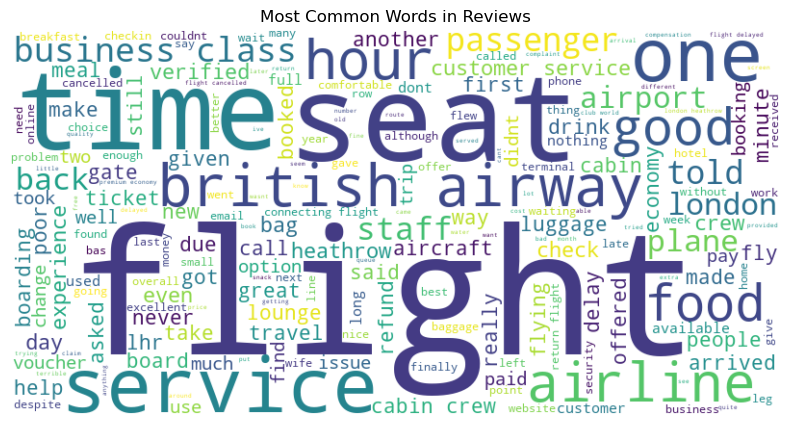

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["cleaned_reviews"]))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()

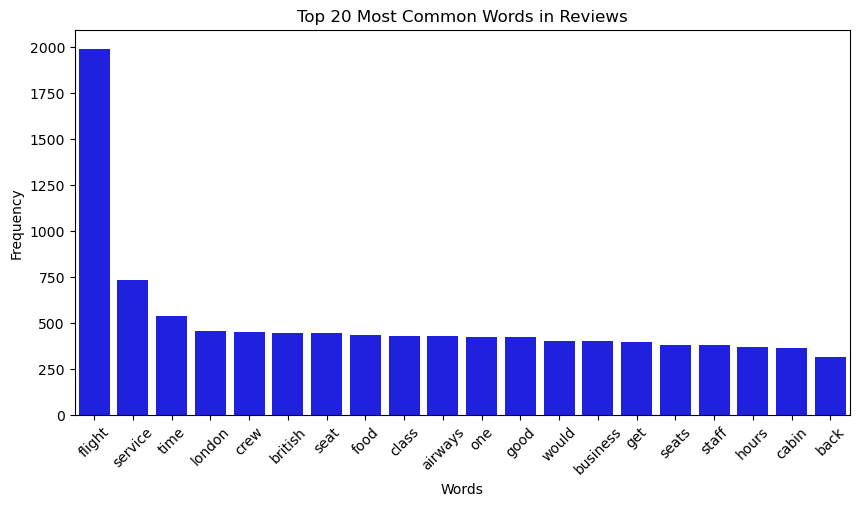

In [32]:
from collections import Counter
import seaborn as sns

# Tokenize all reviews and count word frequencies
all_words = " ".join(df["cleaned_reviews"]).split()
word_freq = Counter(all_words)

# Convert to DataFrame for visualization
word_freq_df = pd.DataFrame(word_freq.items(), columns=["word", "count"]).sort_values(by="count", ascending=False)

# Plot top 20 most common words
plt.figure(figsize=(10,5))
sns.barplot(x=word_freq_df["word"][:20], y=word_freq_df["count"][:20], color="blue")
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [33]:
from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df["sentiment"] = df["cleaned_reviews"].apply(get_sentiment)

# Save the dataset with sentiment labels
df.to_csv("/Users/afnansmac/Documents/projects/britishAirways/data/WebScrapping/sentiment_reviews.csv", index=False)
print("✅ Sentiment analysis saved to /Users/afnansmac/Documents/projects/britishAirways/data/sentiment_reviews.csv")

✅ Sentiment analysis saved to /Users/afnansmac/Documents/projects/britishAirways/data/sentiment_reviews.csv


In [34]:
# Count the number of each sentiment category
sentiment_counts = df["sentiment"].value_counts()

# Total number of reviews
total_reviews = len(df)

# Calculate percentages
sentiment_percentages = (sentiment_counts / total_reviews) * 100

# Display results
print("🔢 Number of Reviews:")
print(sentiment_counts)

print("\n📊 Percentage of Reviews:")
print(sentiment_percentages.round(2))


🔢 Number of Reviews:
sentiment
Positive    621
Negative    361
Neutral      18
Name: count, dtype: int64

📊 Percentage of Reviews:
sentiment
Positive    62.1
Negative    36.1
Neutral      1.8
Name: count, dtype: float64


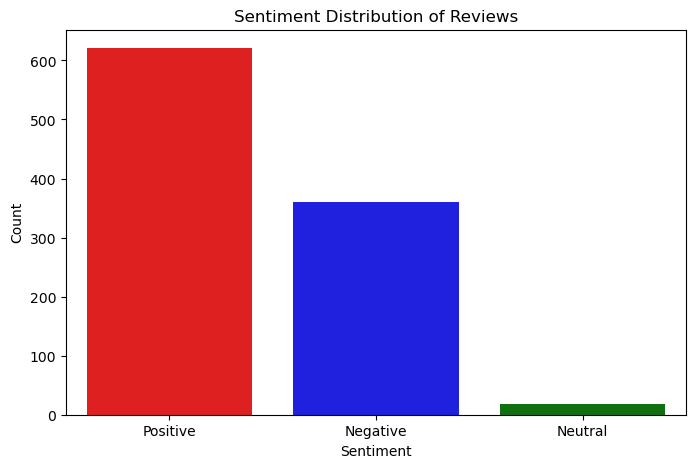

In [35]:

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="sentiment", data=df, palette=["red", "blue", "green"])
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()